Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [51]:
#Importimg required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

In [52]:
#Loadind data
hr=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
hr

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

There are 1470 rows and 35 columns

In [53]:
#checking the datatype of each column 
print(hr.dtypes)
# All features are of integer except Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime which are object
print(hr.info())

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [54]:
#Checking column names
hr.keys()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [55]:
#Checking data set shape
hr.shape
#There are 1470 rows and 35 columns .

(1470, 35)

In [56]:
hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:>

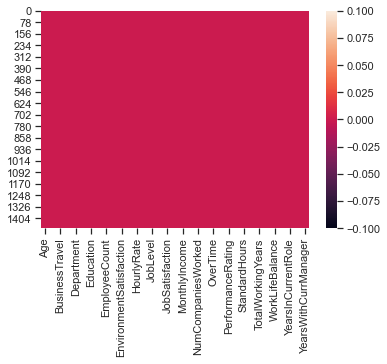

In [57]:
#checking null values using heat map
sns.heatmap(hr.isnull())
#we can see that their is no null values

In [58]:
#Checking null values
hr.isnull().sum()
#There is no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [59]:
# statistical information about the data.
hr.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

OBSERVATIONS:

Count value is constant, assuming no null values.
Daily wages per employee ranges from Rs.102 to 1500.00, where as hourly rate from Rs.30 to 100.00
Standard hours of work is 80 hours for all employees.
Average age is 36; ranges from 18-60yrs.
All other features have values ranges from minimum to maximum , which will be analysed further.

# EDA

# Univariate Analysis

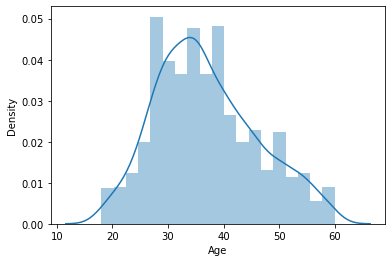

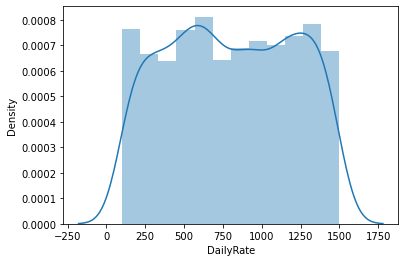

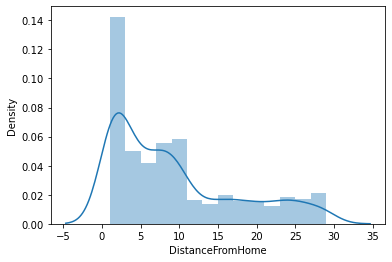

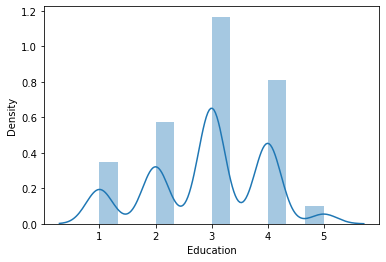

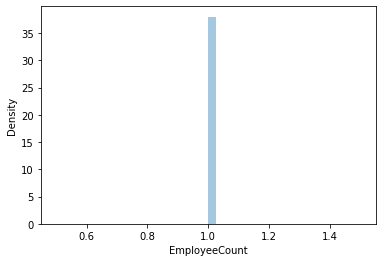

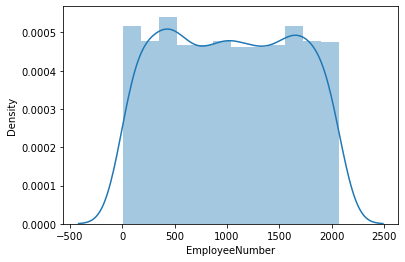

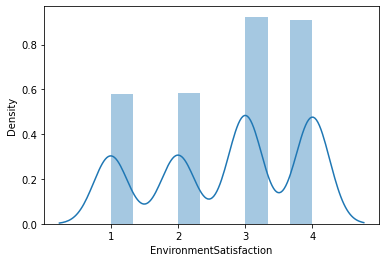

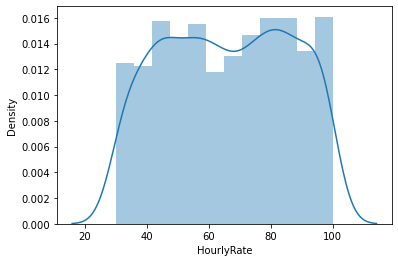

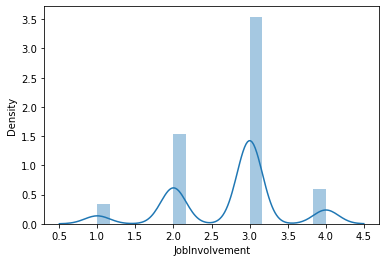

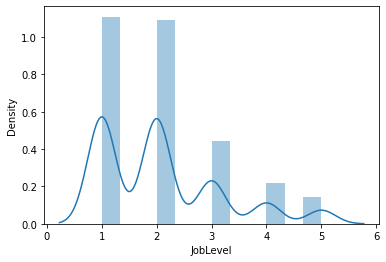

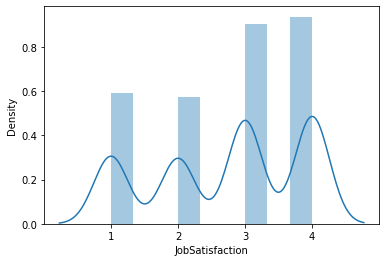

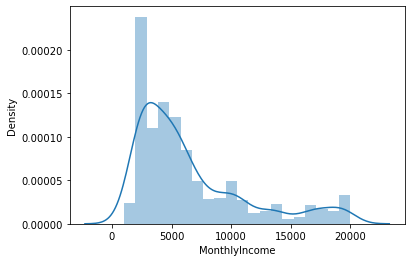

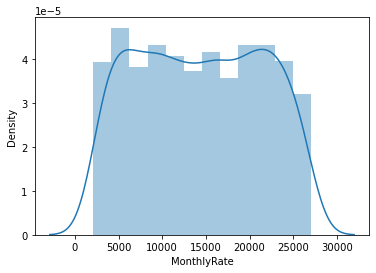

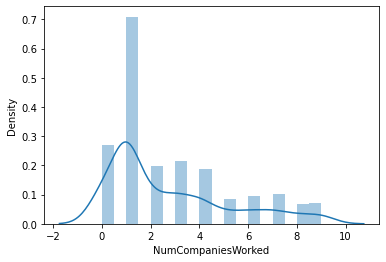

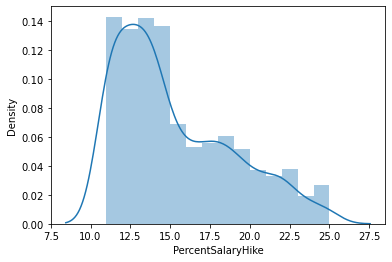

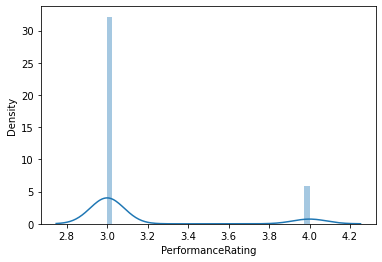

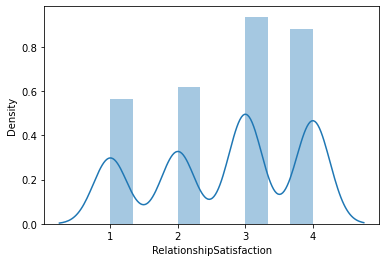

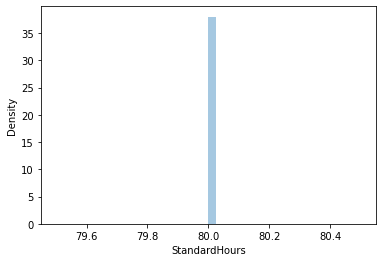

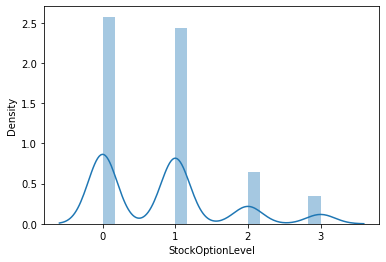

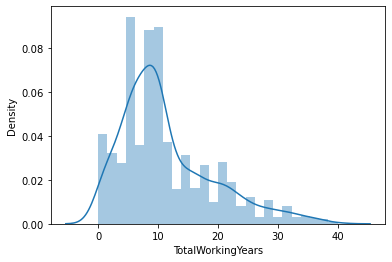

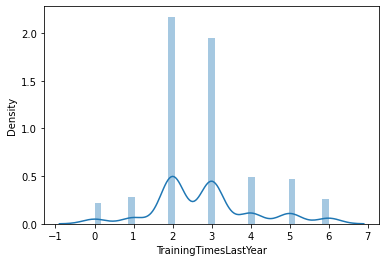

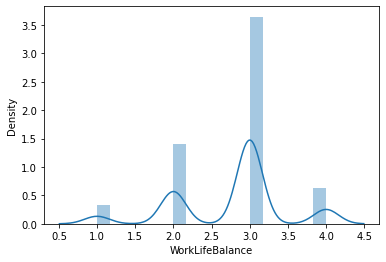

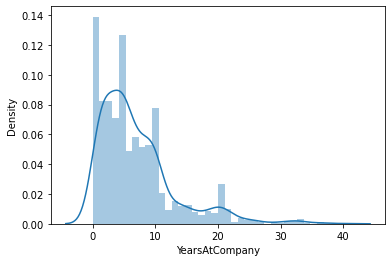

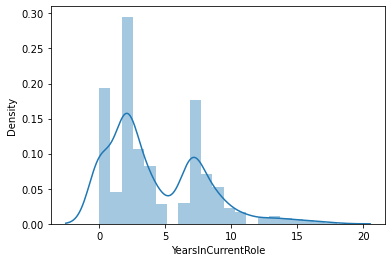

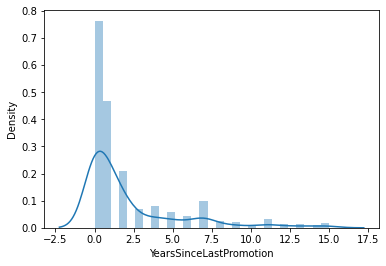

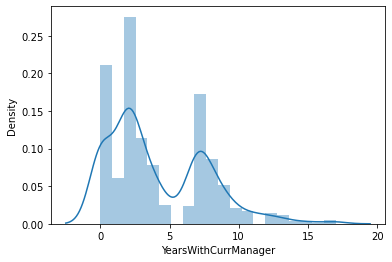

In [10]:
#from below observation we can say that data in the data set are not normally distributed
#as we can see work life balace, years at company,years Since last promotion, training times last year,job satisfaction
#are very skewed
for i in hr.describe().columns:
    sns.distplot(hr[i])
    plt.show()

Age                            AxesSubplot(0.125,0.749828;0.0945122x0.130172)
DailyRate                   AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
DistanceFromHome            AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Education                   AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
EmployeeCount               AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
EmployeeNumber              AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
EnvironmentSatisfaction     AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
HourlyRate                     AxesSubplot(0.125,0.593621;0.0945122x0.130172)
JobInvolvement              AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
JobLevel                    AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
JobSatisfaction             AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
MonthlyIncome               AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
MonthlyRate                 AxesSubplot(0.692073,0.593621;0.0945

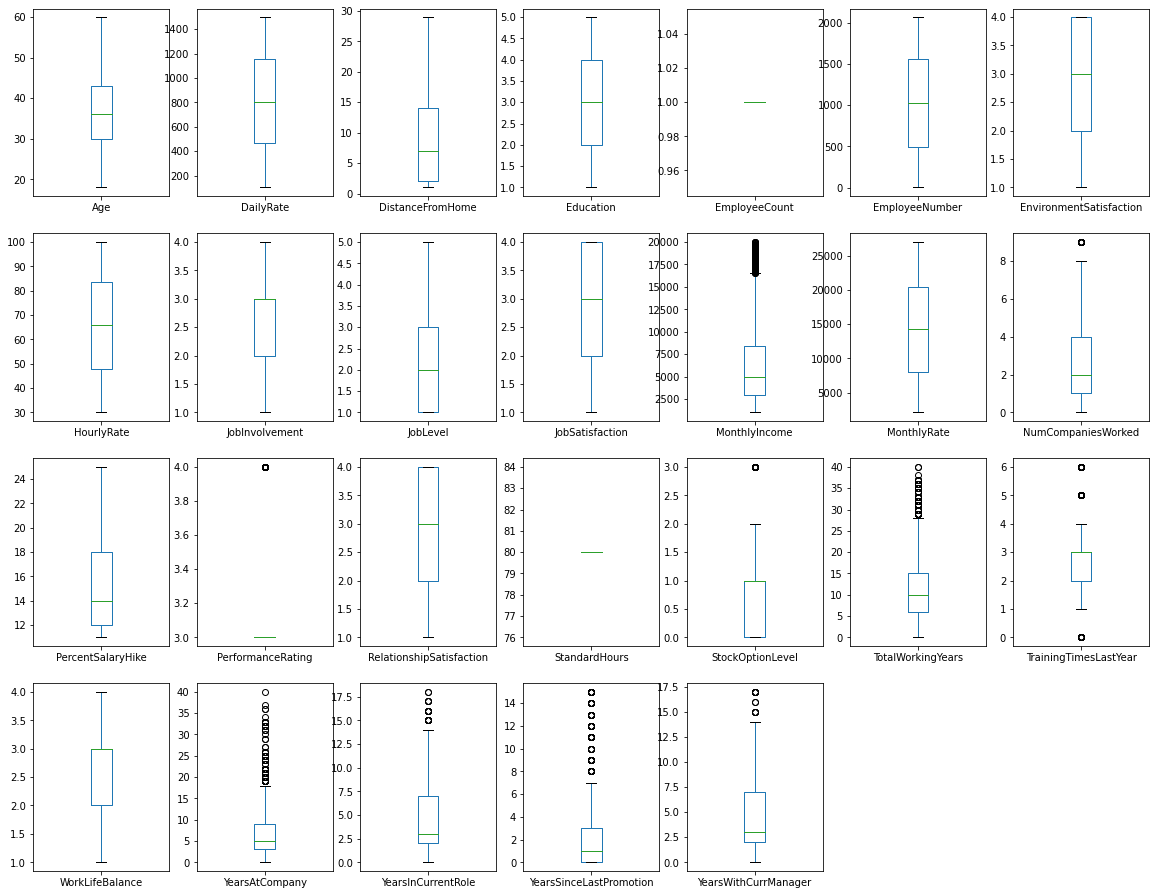

In [11]:
# from below observation we can say that many outliers are present in montly income, total working years, years at company

hr.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

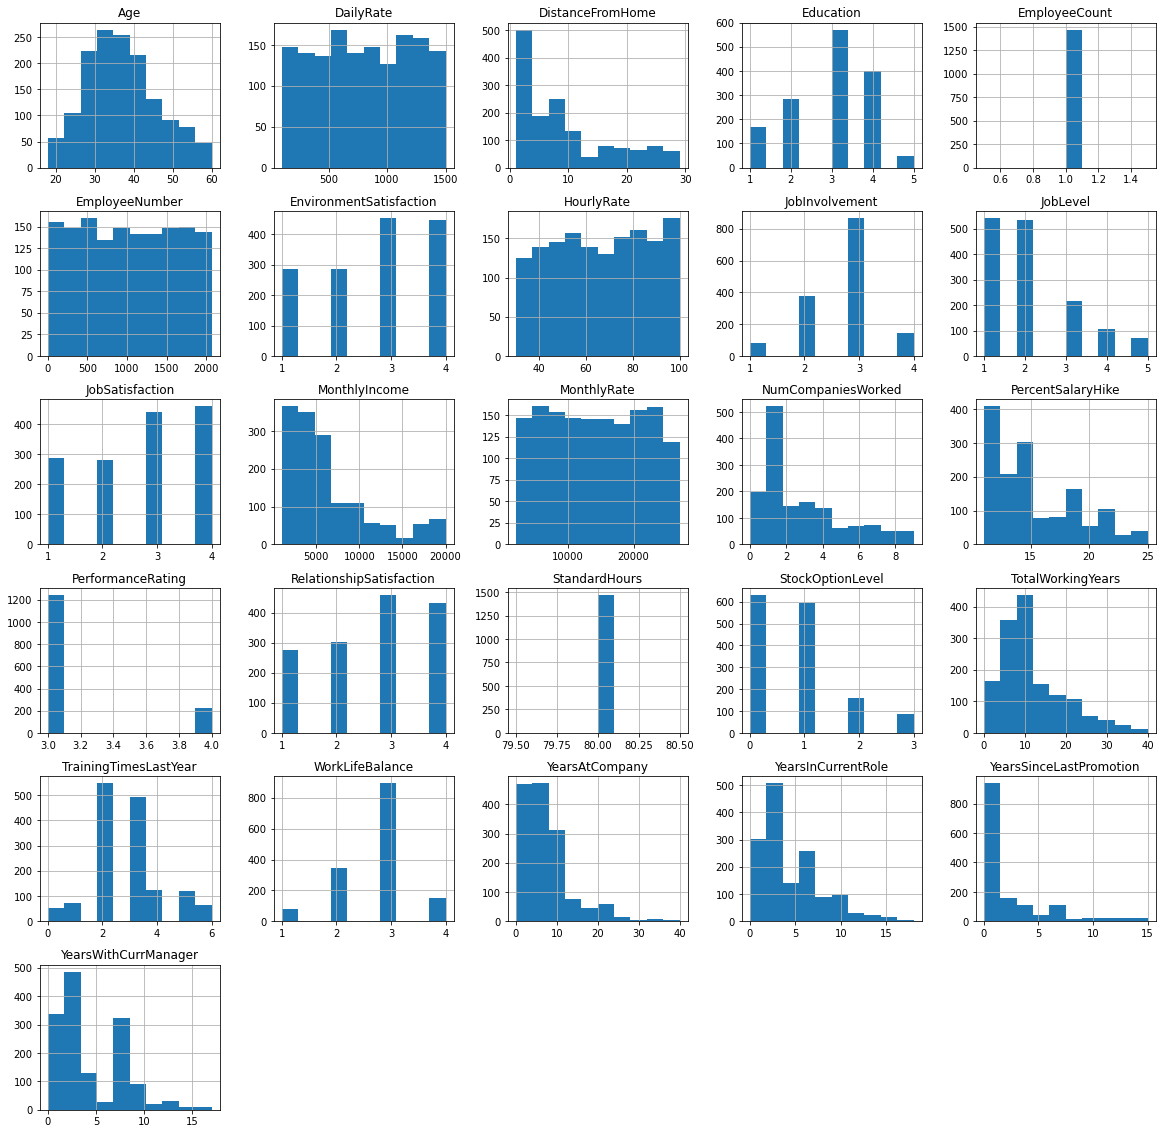

In [12]:
hr.hist(figsize=(20,20))


OBSERVATIONS:
1.Majority rated 3 and 4 for job satisfaction.
2.Most of the employees have long length of service which supports the work atmosphere in the company.
3.Performance rating and Relationship satisfaction is average rated.
4.Large number of employees received promotion less than 1.5yrs.

<AxesSubplot:ylabel='Attrition'>

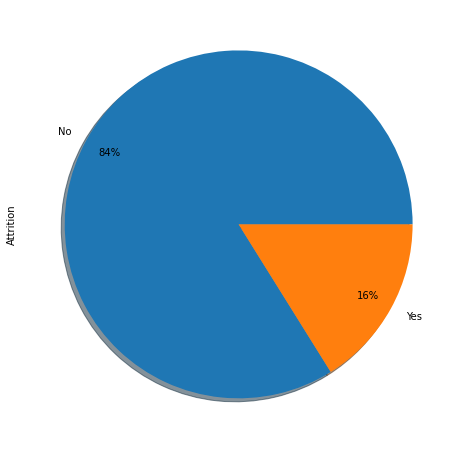

In [13]:
# Analysing data distribution of each variable.
plt.figure(figsize=(10,8))
hr['Attrition'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)

From the pie chart, 16% of HR employees due to various reasons wants to move out of the organizaton and majority 84% would like to stay.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

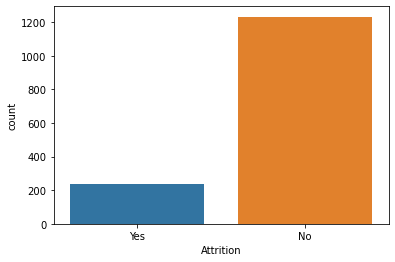

In [14]:
# checking count of attrition
sns.countplot(hr['Attrition'])

In [15]:
# Lets create count variable for all categorical variables.
#Listing all categorical variables, which we will be analysing with countplot.
cat_var=hr.select_dtypes(include=np.object)
cat_var.dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [16]:
# Return the tuple feature_num with index number
list(enumerate(cat_var))

[(0, 'Attrition'),
 (1, 'BusinessTravel'),
 (2, 'Department'),
 (3, 'EducationField'),
 (4, 'Gender'),
 (5, 'JobRole'),
 (6, 'MaritalStatus'),
 (7, 'Over18'),
 (8, 'OverTime')]

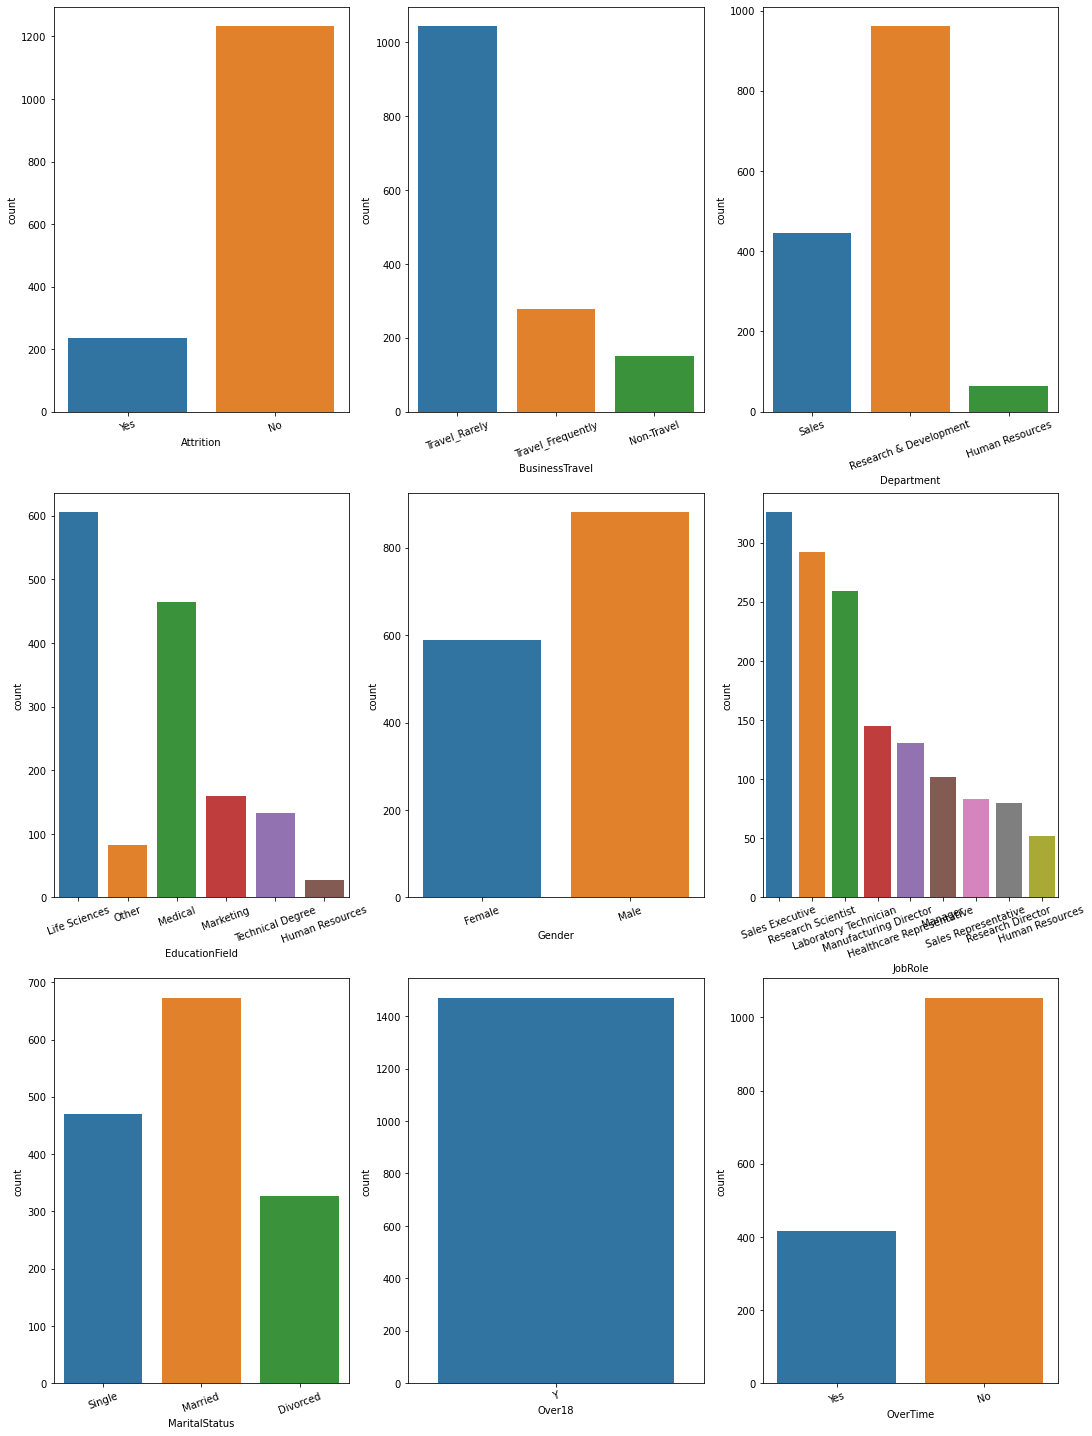

In [17]:
# created a for loop to plot (count plot) all categorical variables.
plt.figure(figsize=(18,70))
for i in enumerate(cat_var):
    plt.subplot(8,3,i[0]+1)
    sns.countplot(i[1],data=hr)
    plt.xticks(rotation=20)

1.Majority of the emloyees travel rarely, frequent travellers and non travellers are almost equal and very low in number.
2.Highest number of employees are in Research & development, then comes sales and least of all in HR.
3.Male employees are over 900(~1000) and female employees less than 600.
4.More than 400 employees are sales dept and the lowest in HR dept.
5.considering overtime, more than 1000 officers does overtime whereas near to 400 doesn't.

# Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

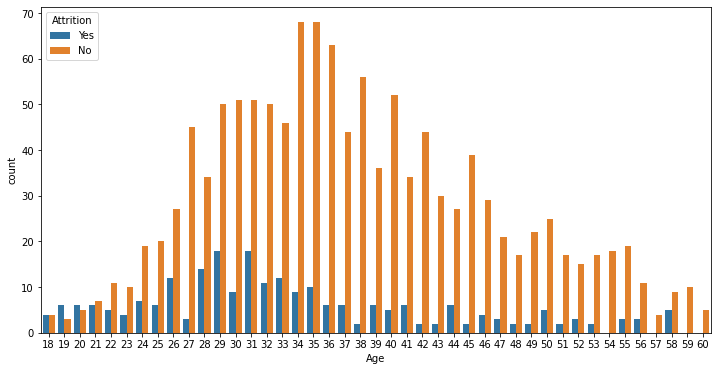

In [18]:
# from the below analysis we can see that age between 34 and 35 are not facing Attirition and age between 28 to 31 are facing more Attrition
plt.subplots(figsize=(12,6))
sns.countplot(x='Age',hue='Attrition',data=hr)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

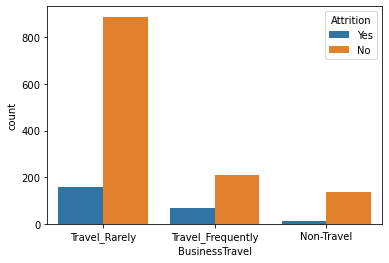

In [19]:
#From below observation we can say that employee Travel freqently has more attrition as compared to travel rarely and no travel
sns.countplot(x='BusinessTravel',hue='Attrition',data=hr)

<AxesSubplot:xlabel='Gender', ylabel='count'>

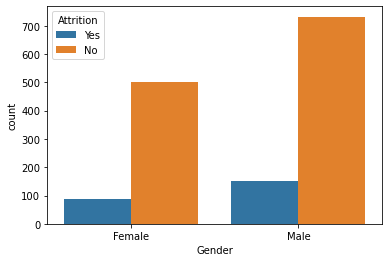

In [20]:
#from below observation we can say that Attrition in Male and Female are proportional
sns.countplot(x="Gender",hue="Attrition",data=hr)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

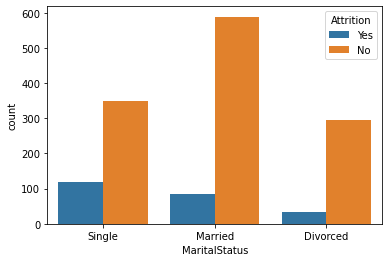

In [21]:
# from below observation we can say that Attrition in singles are more as compared to married and divorced
sns.countplot(x="MaritalStatus",hue="Attrition",data=hr)

<AxesSubplot:xlabel='Department', ylabel='count'>

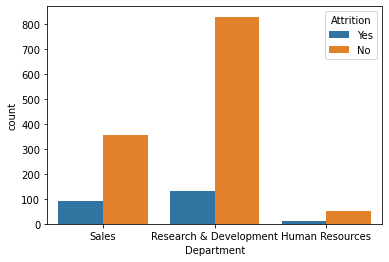

In [22]:
#from below observation we can say that Attrition in sales is more as compared to r&d
sns.countplot(x="Department",hue="Attrition",data=hr)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

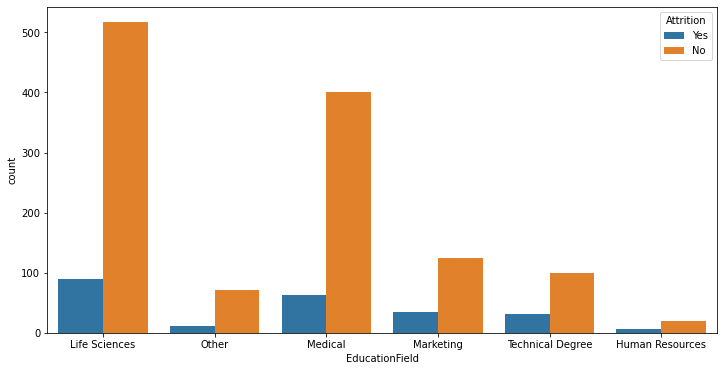

In [23]:
#from below observation we can say Attrition in all the edution feilds are quite same
plt.subplots(figsize=(12,6))
sns.countplot(x="EducationField",hue="Attrition",data=hr)

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

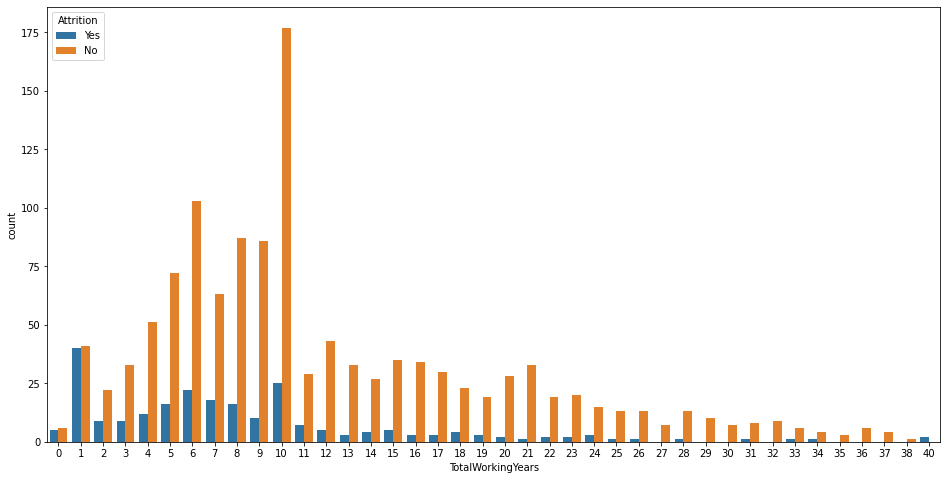

In [24]:
#from below obsevation we can say that employee who recently joined the company  and who are senior most face more Attrition
plt.subplots(figsize=(16,8))
sns.countplot(x="TotalWorkingYears",hue="Attrition",data=hr)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

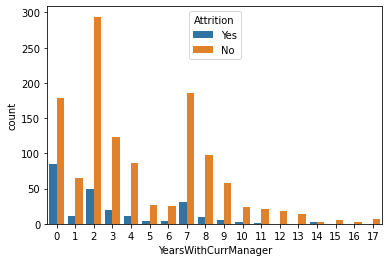

In [25]:
sns.countplot(x="YearsWithCurrManager",hue="Attrition",data=hr)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

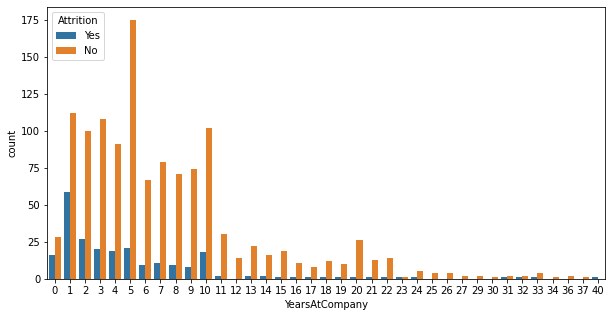

In [26]:
# from below observation we can say that employee with less no of experience(0 and 1) and who are senior most in company has more Attrition 
plt.subplots(figsize=(10,5))
sns.countplot(x="YearsAtCompany",hue="Attrition",data=hr)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

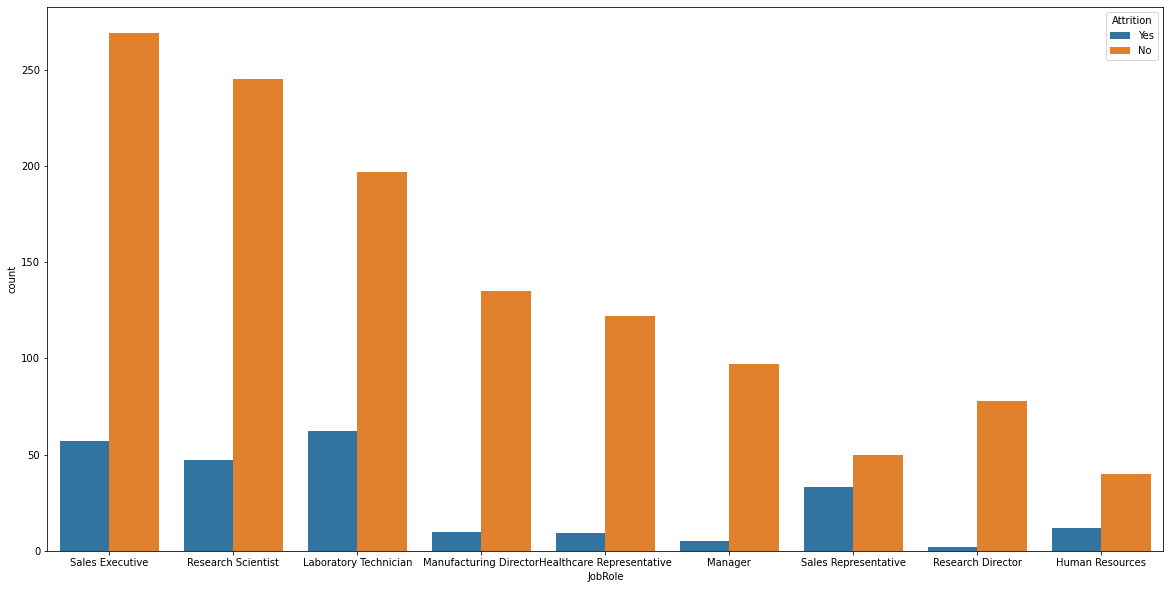

In [27]:
#from below observation we can say that Attrition in sales executive are moew than other
plt.subplots(figsize=(20,10))
sns.countplot(x="JobRole",hue="Attrition",data=hr)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

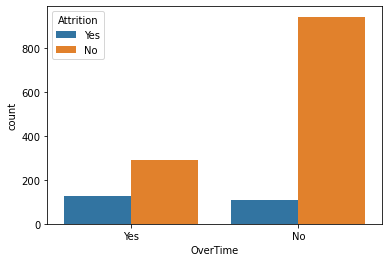

In [28]:
#here we can say that employee who work for extra hours face more Attrition
sns.countplot(x="OverTime",hue="Attrition",data=hr)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

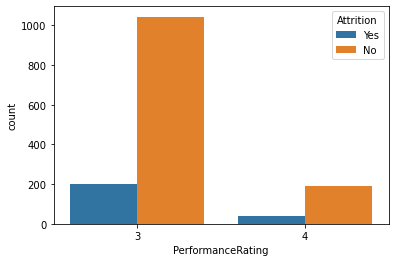

In [29]:
# Attrition in employees w.r.t performance rating are  proportional
sns.countplot(x="PerformanceRating",hue="Attrition",data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

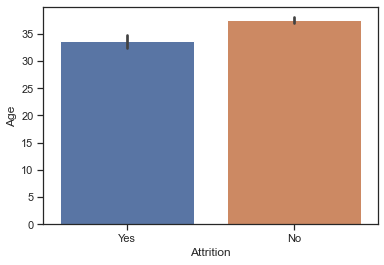

In [30]:
sns.set_theme(style="ticks", color_codes=True)

sns.barplot(x="Attrition", y="Age", data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

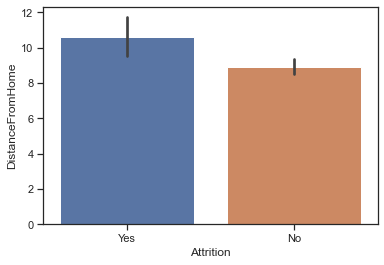

In [31]:
sns.barplot(x="Attrition", y="DistanceFromHome", data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

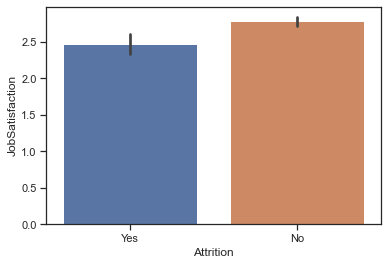

In [32]:
sns.barplot(x="Attrition", y="JobSatisfaction", data=hr)

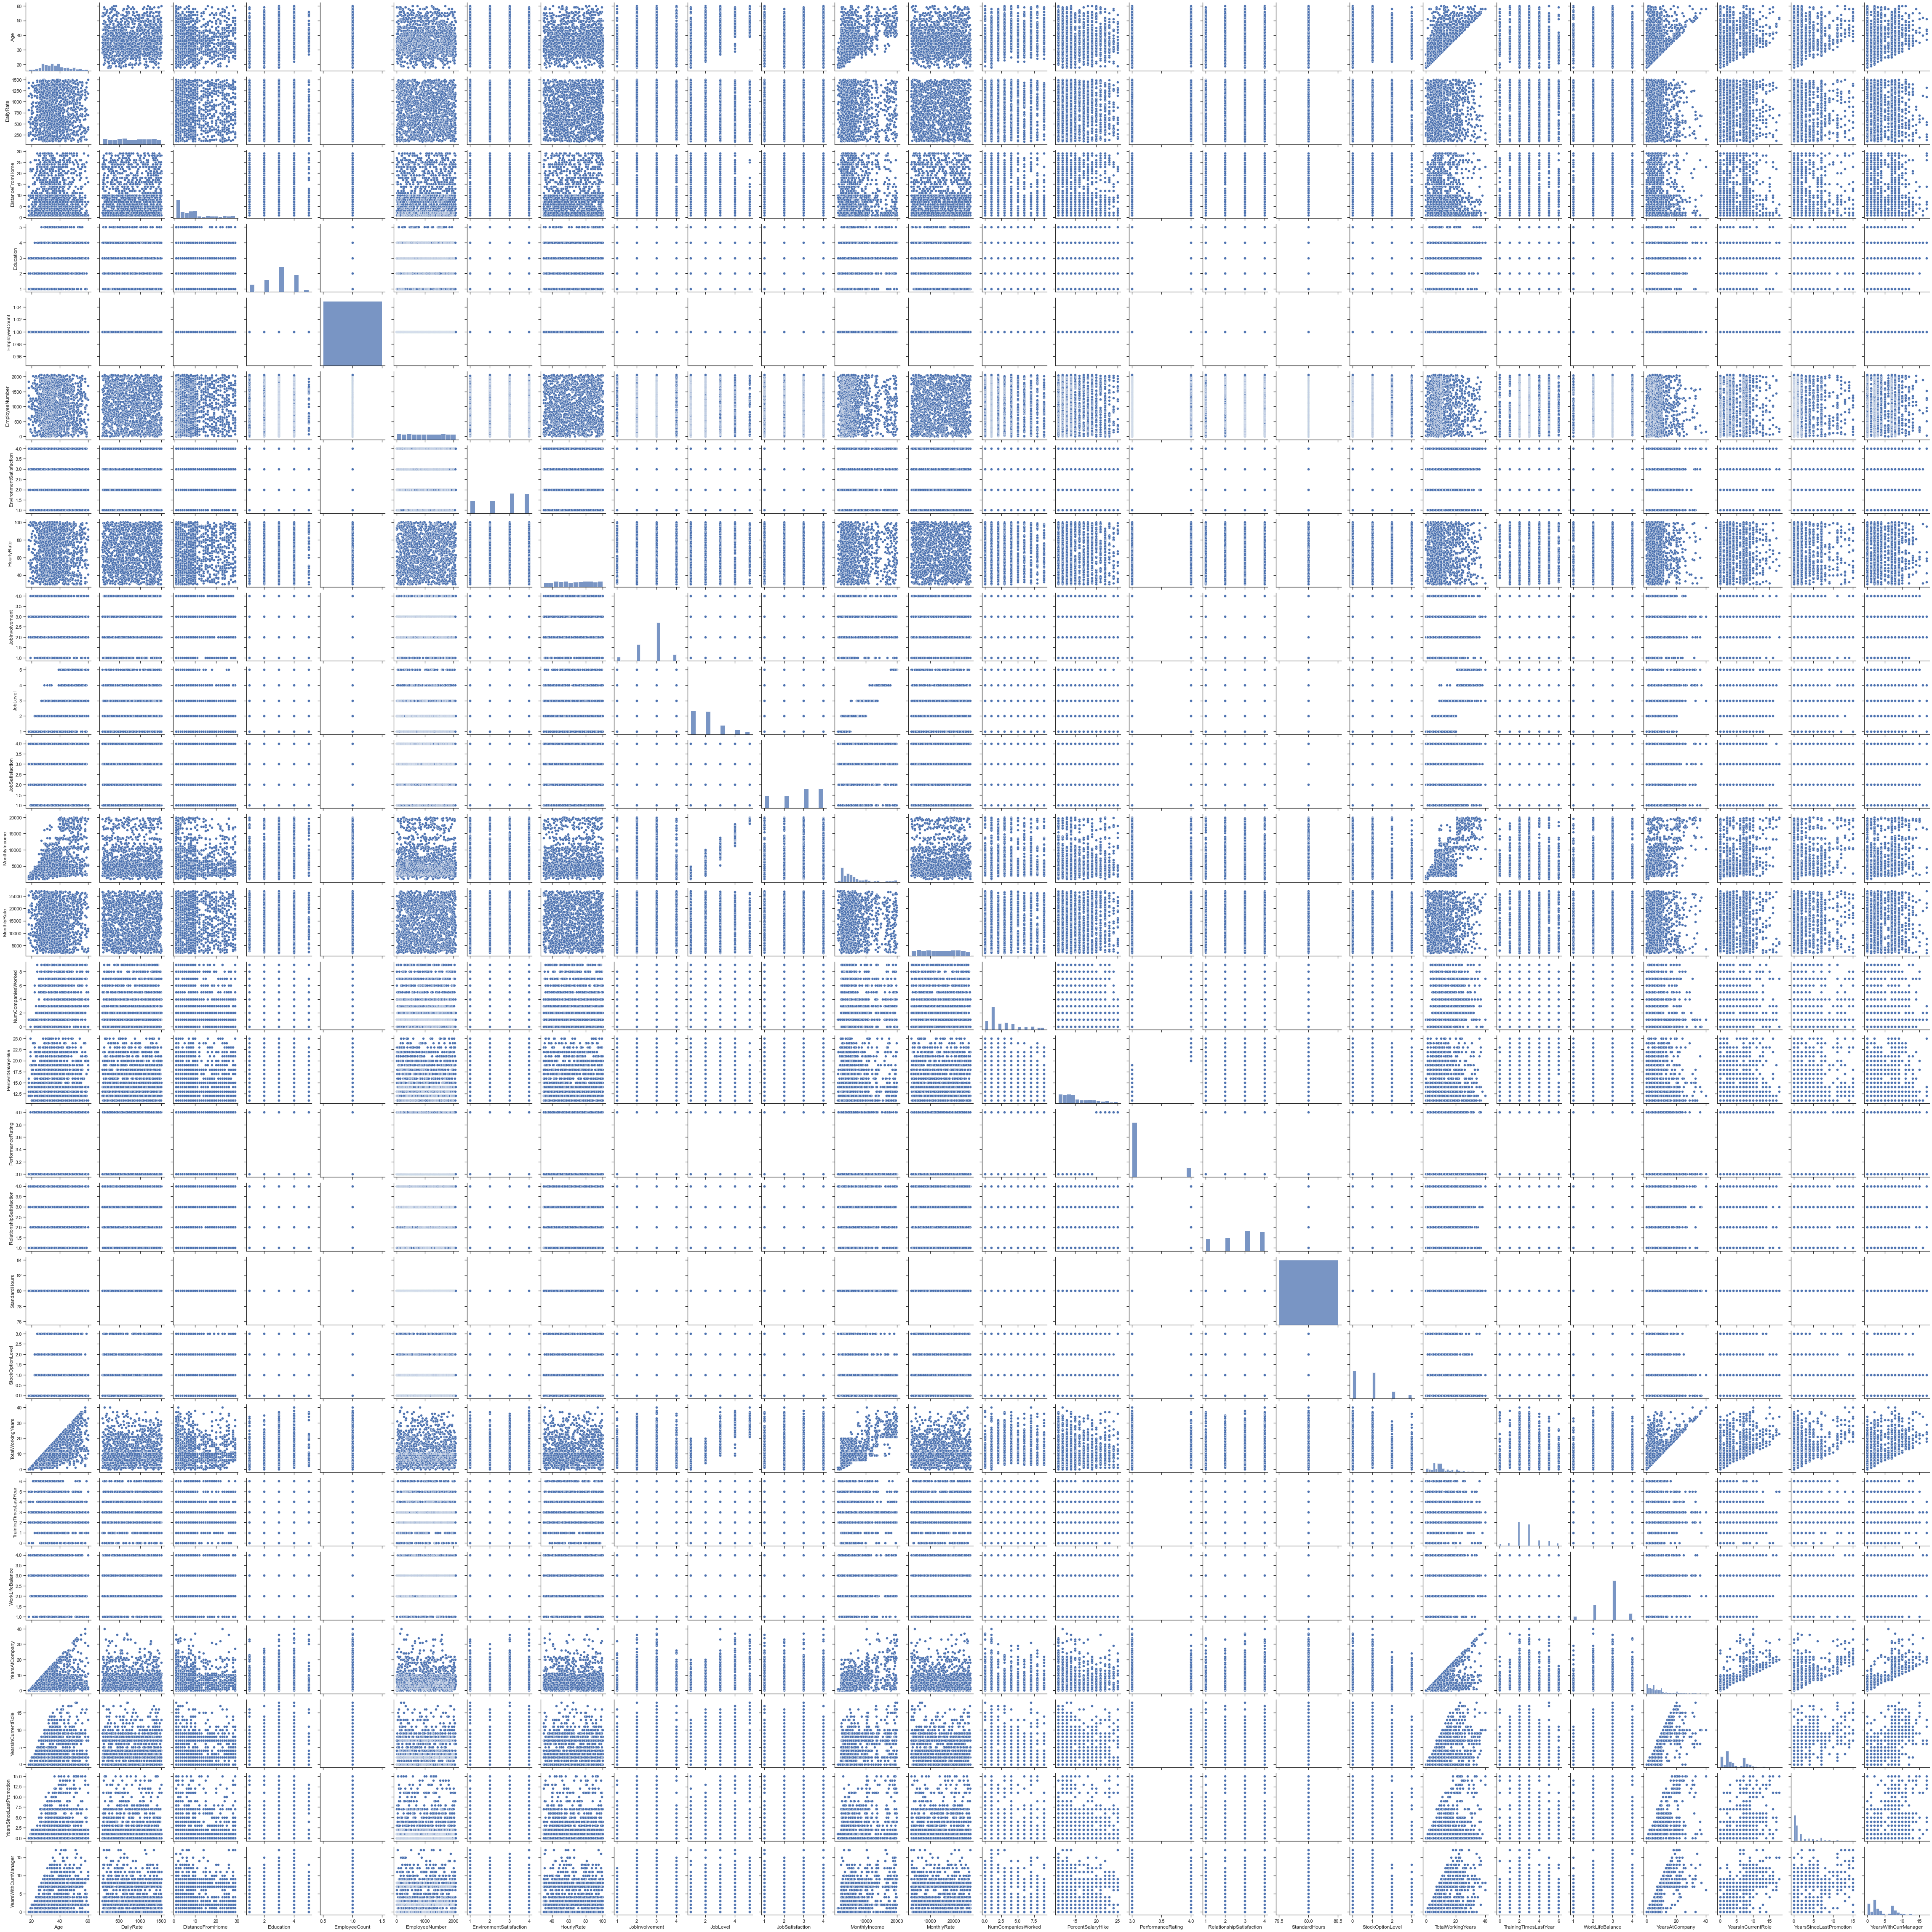

In [33]:
sns.pairplot(hr)

# Statistical Analysis

In [60]:
hr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

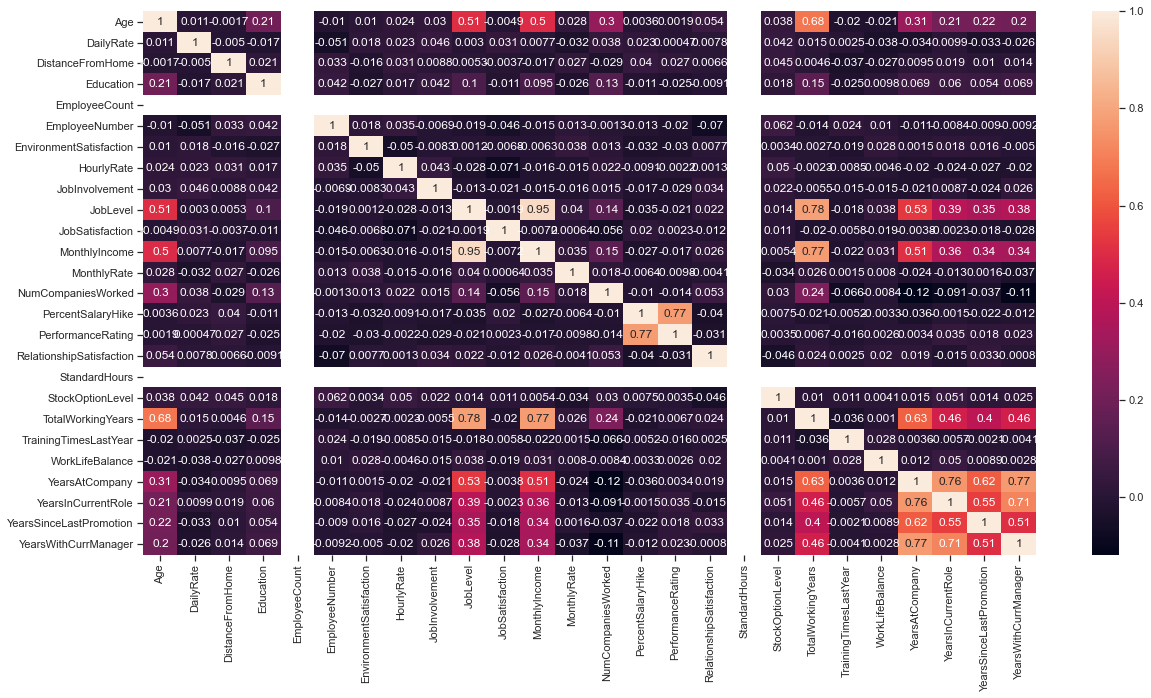

In [61]:
#Observing corelation between the columns through heatmap
plt.figure(figsize=(20,10))
sns.heatmap(hr.corr(),annot=True)
plt.show

In [62]:
#Checking correlation
hr.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

# Dropping of unnecessary columns

In [63]:
#from the above statistical analysis
#we can drop age over 18 columns because each employee is 18 plus as min age is 18
#we can drop Employee Count and Standard Hours as it contains same values all over the data
#we can drop employee number as it does not contain any usefull information
hr.drop(columns=["StandardHours"],inplace=True)
hr.drop(columns=["Over18"],inplace=True)
hr.drop(columns=["EmployeeCount"],inplace=True)
hr.drop(columns=["EmployeeNumber"],inplace=True)

# Label Encoding

In [64]:
#Using Label Encoder to convert all categorial data into numbers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for i in list1:
    hr[i]=le.fit_transform(hr[i].astype(str))

In [65]:
hr.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

### TRAIN TEST SPLIT

In [66]:
# Assigned target variable into y and others to x.
y=hr['Attrition']
x=hr.drop('Attrition', axis=1)

In [67]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25,random_state=0)

### MODELLING DATA

#### 1. LOGISTIC REGRESSION

In [68]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train) #Accuracy score on train data
predlr= lr.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predlr))
print("Classification Report:",classification_report(y_test,predlr))
print("Accuracy score:",accuracy_score(y_test, predlr))

Confusion Matrix: [[310   0]
 [ 58   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      1.00      0.91       310
           1       0.00      0.00      0.00        58

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368

Accuracy score: 0.842391304347826


In [69]:
# Cross Validated score for Logistic Regression
scr1= cross_val_score( lr,x,y, cv=10)
print("Cross Validated score for LR is:",scr1.mean())

Cross Validated score for LR is: 0.8414965986394559


#### 2. RANDOMFOREST CLASSIFIER

In [70]:
rfc= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train) #Accuracy score on train data
predrfc= rfc.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predrfc))
print("Classification Report:",classification_report(y_test,predrfc))
print("Accuracy score:",accuracy_score(y_test, predrfc))

Confusion Matrix: [[308   2]
 [ 51   7]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.99      0.92       310
           1       0.78      0.12      0.21        58

    accuracy                           0.86       368
   macro avg       0.82      0.56      0.56       368
weighted avg       0.85      0.86      0.81       368

Accuracy score: 0.8559782608695652


In [71]:
# Cross Validated score for RFC.
scr2= cross_val_score( rfc,x,y, cv=10)
print("Cross Validated score for RFC is:",scr2.mean())

Cross Validated score for RFC is: 0.8489795918367348


#### 3. DECISION TREE CLASSIFIER

In [72]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Cofusion Matrix:",confusion_matrix(y_test,preddtc))
print("Classification Report:",classification_report(y_test,preddtc))
print("Accuracy Score:",accuracy_score(y_test,preddtc))

Cofusion Matrix: [[270  40]
 [ 39  19]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.87      0.87       310
           1       0.32      0.33      0.32        58

    accuracy                           0.79       368
   macro avg       0.60      0.60      0.60       368
weighted avg       0.79      0.79      0.79       368

Accuracy Score: 0.7853260869565217


In [73]:
# Cross Validating DTC
scr3= cross_val_score( dtc,x,y, cv=10)
print("Cross Validated score for DTC is:",scr3.mean())

Cross Validated score for DTC is: 0.8068027210884352


**Best Accuracy is obtained through Random Forest Classifer with 85%.**

### SAVING THE BEST MODEL

In [74]:
import pickle
# save the model to disk
filename = 'finalized_model_RFC.pkl'
pickle.dump(rfc,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,